In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

plt.rcParams['figure.figsize'] = [12, 8]

# $\star$ Question 1:
Load the points from pca.npz and project them to a 1D subspace via PCA. 

Visualize the original points, the linear subspace, and the projected points.

Compute the projection error.

Data has shape (151, 2).


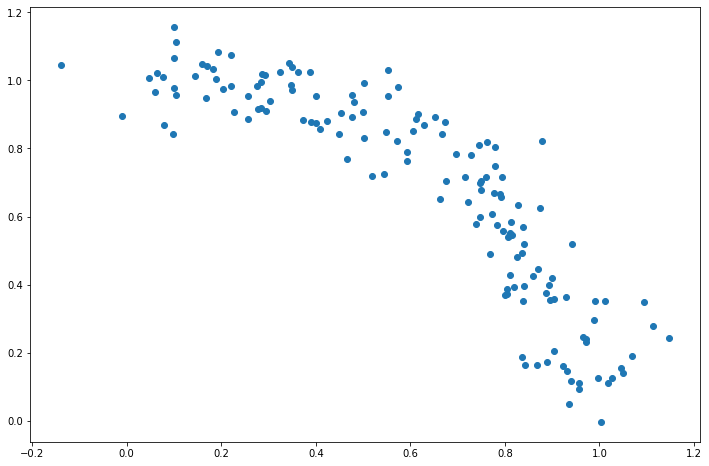

In [2]:
# Load and visualize the data (as in previous exercises):
X = np.load('../data/pca.npz')["arr_0"]
print(f"Data has shape {X.shape}.")
plt.scatter(X[:,0], X[:,1])

## Run PCA:

In [3]:
def run_pca(X, d, return_y=False):
    """
    Runs PCA to project input data to a lower-dimensional subspace and plots the results. 
    
    Args:
        X: Input data.
        d: Dimensionality of the space to which the data should be projected.
        return_y: Optional,reconstruct the original data (with an approximation error)
    """
    # Compute the mean and covariance of the input data (using numpy). 
    # Center the data around 0 by subtracting the mean:
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    cov = np.cov(X_centered, rowvar=False)

    # Compute the eigenvalues and eigenvectors of the covariance matrix (using numpy):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)

    # Sort the eigenvalues and eigenvectors in descending order (using numpy argsort):
    ordered_indices = np.argsort(eigenvalues)[::-1]
    ordered_eigenvectors = eigenvectors[:, ordered_indices]
    
    # Select the d eigenvectors with the largest eigenvalues and use them to 
    # project the data to the subspace (slide 10, point 2.). 
    # Store the projected data in a variable called 'alpha':
    eigenvector_subset = ordered_eigenvectors[:, :d]
    alpha = np.dot(X_centered, eigenvector_subset)
    
    if return_y== True:
        #  Reconstruct the data in the original space (slide 10, point 3.):
        y = X_mean + np.dot(alpha, eigenvector_subset.transpose())
        
        # Compute and print the squared projection error (slide 9):
        J = ((X-y)**2).mean()
        print("Squared projection error: ", J) 
        
        return alpha , y
    else:
        return alpha

Squared projection error:  0.0062069101252815685


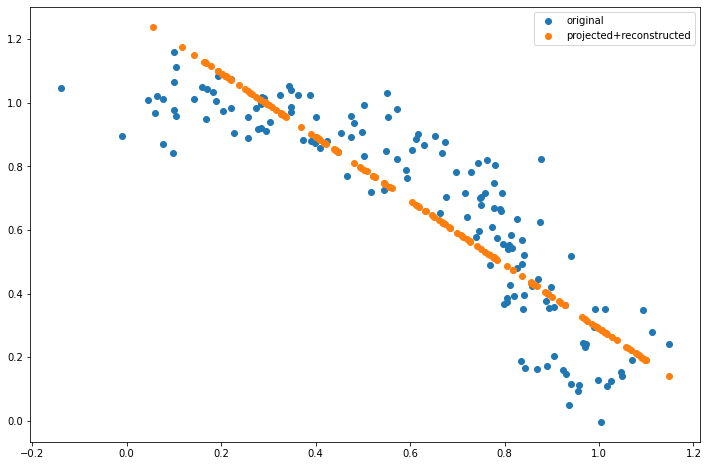

In [4]:
# Run PCA and plot the original and reconstructed data: 
X_transformed, X_reconstucted = run_pca(X, 1, return_y = True)

plt.scatter(X[:, 0], X[:, 1], label="original")
plt.scatter(X_reconstucted[:, 0], X_reconstucted[:, 1], label="projected+reconstructed")
plt.legend()
plt.show()

# $\star$ Question 2:
Apply the t-SNE algorithm to the MNIST dataset. You do not need to
implement it yourself, there is a standard sklearn function available.

The data can be downloaded from http://yann.lecun.com/exdb/mnist/, however you can also use https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html to import it directly with the name 'mnist_784'

Try both 2 and 3-dimensional visualization. Use the original images flattened into 1D vectors as high-dimensional features. 

Play around with the perplexity parameter and see how it affects the result.

Apply PCA to the same data and compare the visualizations.

In [5]:
# Download the MNIST dataset. This can and take some time:
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target
print(X.shape)

(70000, 784)


target 0


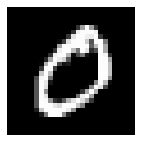

target 4


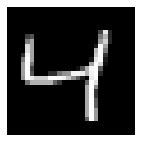

target 1


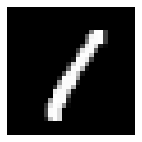

target 9


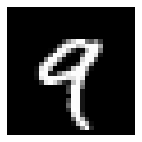

In [6]:
# Plot a few examples from mnist
X_ = np.asarray(X)
for i in range(1, 5):
    digit = X_[i]
    plt.subplot(330 + 1 + i)
    digit_pixels = digit.reshape(28, 28)
    plt.imshow(digit_pixels, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    print("target", y[i])
    plt.show()

(3500, 784) (3500,)
(3500, 2)


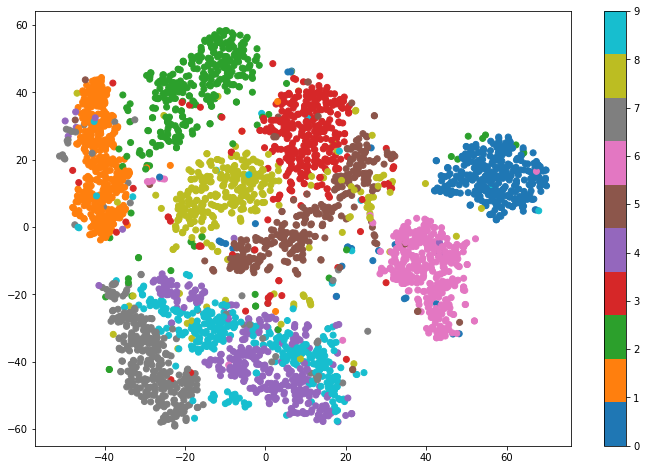

In [7]:
# Apply T-SNE with a 2d embedding space to the MNIST data and plot the results.
# Only apply T-SNE to a smaller subset of the data (which can be obtained for example via
# the train_test_split function), as T-SNE is computationally expensive:
def plot_2d(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y.astype(float), cmap="tab10")
    plt.colorbar()
    plt.show()
    return

X_1, X_2, Y_1, Y_2 = train_test_split(X, y, stratify=y, test_size=0.05, random_state=42)
print(X_2.shape, Y_2.shape)

# apply T-SNE and then call plot_2d::
X_embedded = TSNE(n_components=2, perplexity=40.0, init='random', learning_rate=200).fit_transform(X_2)
print(X_embedded.shape)
plot_2d(X_embedded, Y_2)

Perplexity: 1


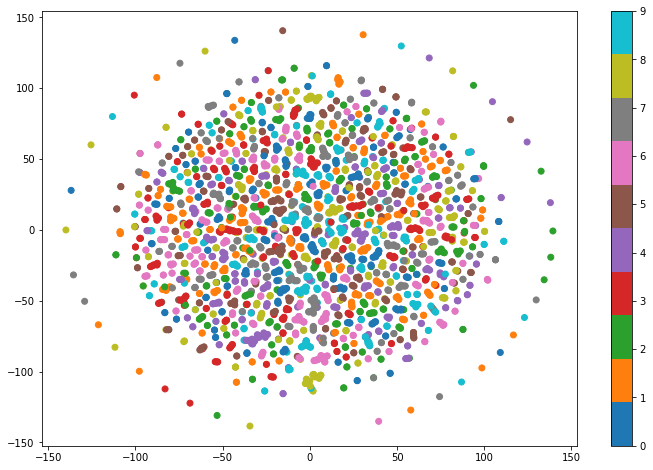

Perplexity: 2


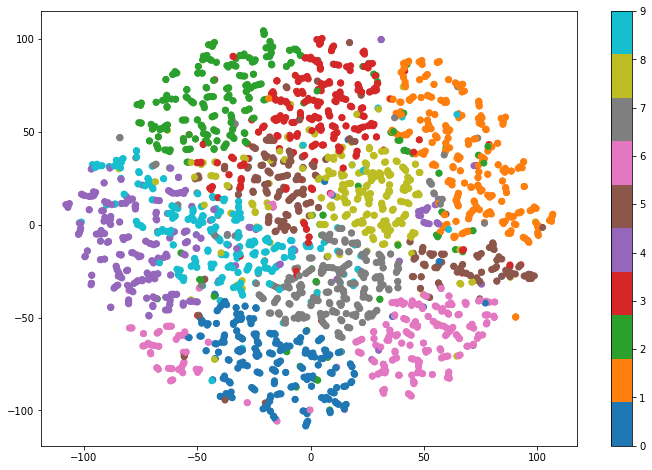

Perplexity: 5


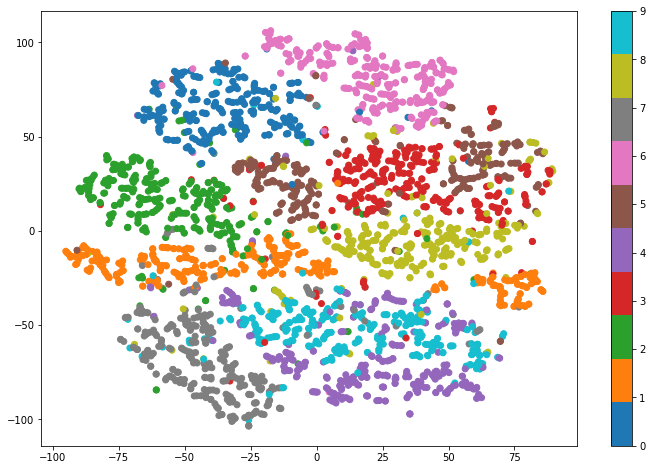

Perplexity: 10


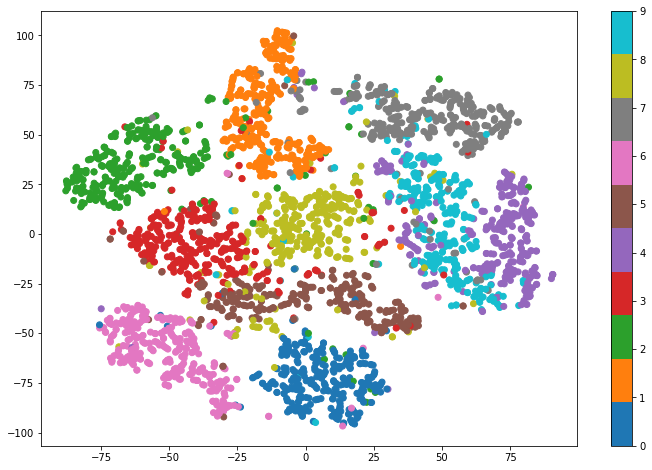

Perplexity: 20


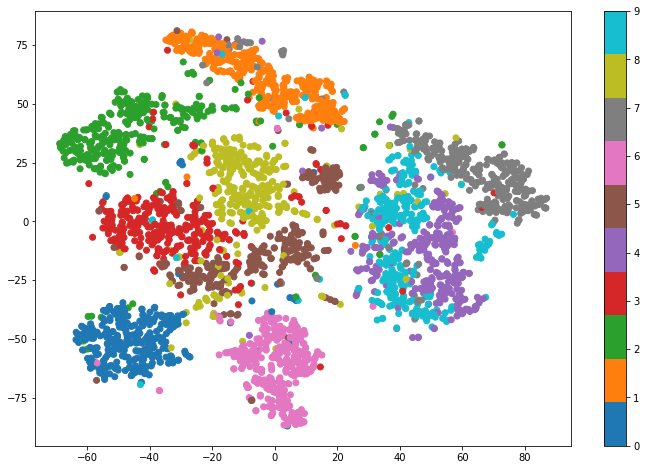

In [8]:
# Run T-SNE with varying perplexity values:
for perplexity in [1, 2, 5, 10, 20]:
    print("Perplexity:", perplexity)
    X_embedded = TSNE(n_components=2, perplexity=perplexity, init='random', learning_rate=200).fit_transform(X_2)
    plot_2d(X_embedded, Y_2)

(3500, 3)


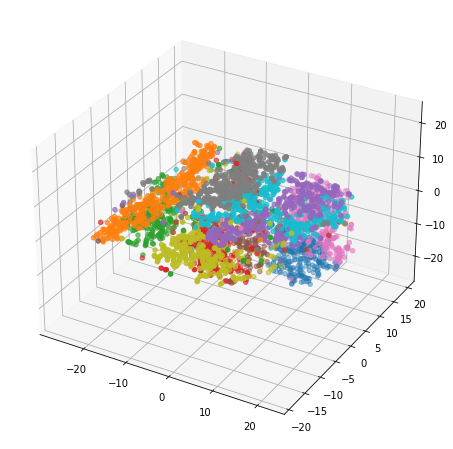

In [9]:
# Apply T-SNE with a 3d embedding space to the MNIST data and plot the results:
def plot_3d(X, y):
    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.astype(float), cmap="tab10")
    plt.show()
    return

# apply T-SNE and then call plot_3d:
X_embedded = TSNE(n_components=3, perplexity=40.0, init='random', learning_rate=200).fit_transform(X_2)
print(X_embedded.shape)
plot_3d(X_embedded, Y_2)

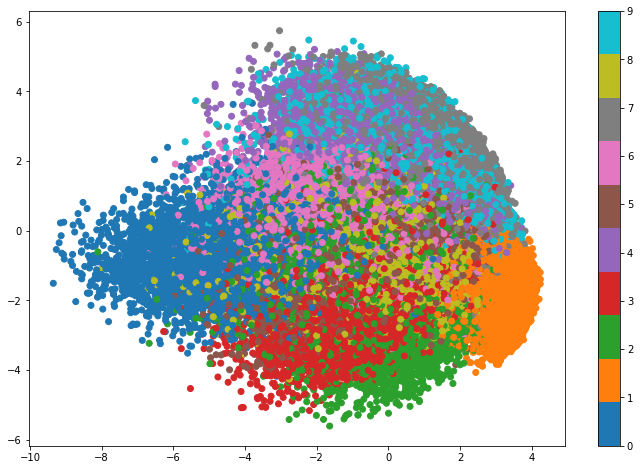

In [10]:
# Apply PCA to the MNIST data.
# Note that PCA is less computationally complex, so you can apply it to the full dataset:
X_transformed = run_pca(X, 2)
plot_2d(X_transformed, y)

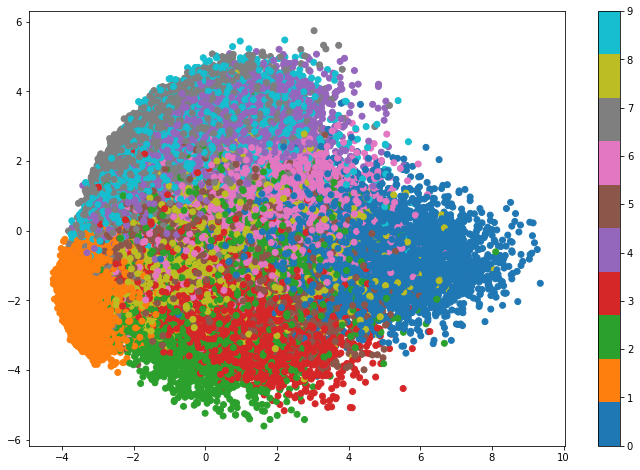

In [11]:
# Apply PCA from sklearn to check PCA implementation:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_trans = pca.fit_transform(X)
plot_2d(X_trans, y)